Импортируем необходимые бибдиотеки

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

Загрузим датасет

In [2]:
iris_df = pd.read_csv('Iris.csv') 
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris_df.duplicated().sum()

0

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Проведём анализ датасета

In [6]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


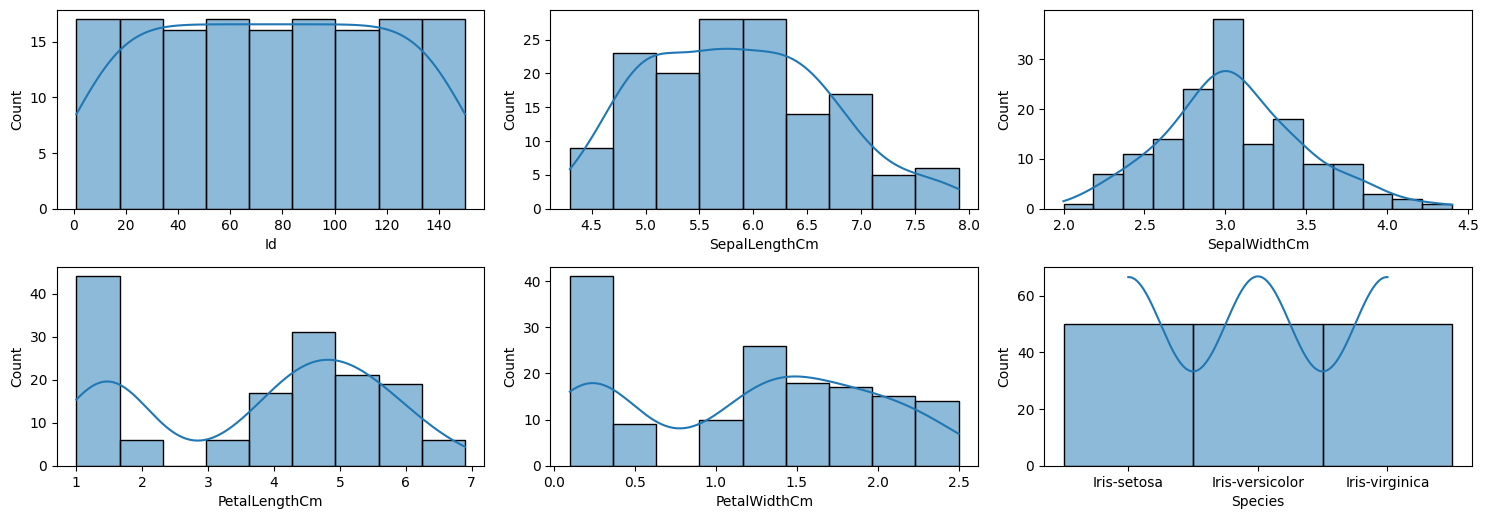

In [8]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(iris_df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(iris_df[column], kde=True)

plt.tight_layout()
plt.show()

In [9]:
df = iris_df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


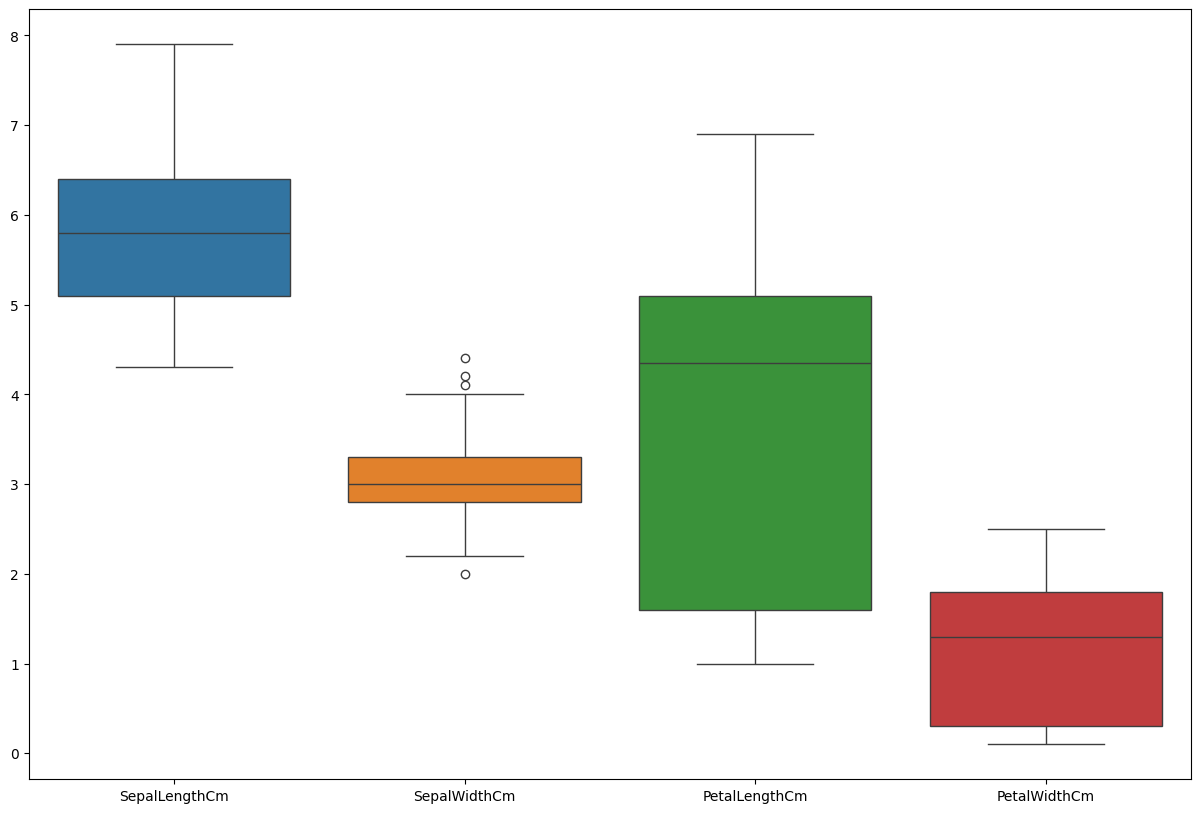

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax=ax)
plt.show()

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
df['Species'] = df['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

/tmp/ipykernel_25008/735938360.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})


In [13]:
df['Species'].value_counts()

Species
1    50
2    50
3    50
Name: count, dtype: int64

In [14]:
X = df.drop('Species', axis=1)
Y = df['Species']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [15]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [16]:
# Создание модели логистической регрессии без регуляризации
model = LogisticRegression(penalty=None)

In [17]:
# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [18]:
# Предсказание на тренировочных данных
y_train_pred = model.predict(X_train)

In [19]:
# Вычисление метрик качества на тренировочных данных
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

In [25]:
# Оцениваем качество модели на тренировочных данных
print('Качество модели на тренировочных данных:')
print(f"Точность: {accuracy_score(y_train, y_train_pred)}")
print(f"Точность: {precision_score(y_train, y_train_pred, average='weighted')}")
print(f"Полнота: {recall_score(y_train, y_train_pred, average='weighted')}")
print(f"F1-мера: {f1_score(y_train, y_train_pred, average='weighted')}")

Качество модели на тренировочных данных:
Точность: 0.9833333333333333
Точность: 0.9833333333333333
Полнота: 0.9833333333333333
F1-мера: 0.9833333333333333


In [26]:
# Предсказание на тестовых данных
y_test_pred = model.predict(X_test)

In [27]:
# Вычисление метрик качества на тестовых данных
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [28]:
# Оцениваем качество модели на тестовых данных
print('Качество модели на тренировочных данных:')
print(f"Точность: {accuracy_score(y_test, y_test_pred)}")
print(f"Точность: {precision_score(y_test, y_test_pred, average='weighted')}")
print(f"Полнота: {recall_score(y_test, y_test_pred, average='weighted')}")
print(f"F1-мера: {f1_score(y_test, y_test_pred, average='weighted')}")

Качество модели на тренировочных данных:
Точность: 1.0
Точность: 1.0
Полнота: 1.0
F1-мера: 1.0


Видно, что модель на тестовых данных лучше отрабатывает. 

In [29]:
# Создаем модели логистической регрессии с L1- и L2-регуляризацией
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l2 = LogisticRegression(penalty='l2')

In [30]:
# Задаем диапазон значений параметра регуляризации
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [32]:
# Используем GridSearchCV для подбора оптимальных значений параметра регуляризации
grid_l1 = GridSearchCV(model_l1, param_grid, cv=5)
grid_l2 = GridSearchCV(model_l2, param_grid, cv=5)

In [33]:
# Обучаем модели с помощью GridSearchCV
grid_l1.fit(X_train, y_train)
grid_l2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [34]:
# Получаем лучшие модели
best_model_l1 = grid_l1.best_estimator_
best_model_l2 = grid_l2.best_estimator_

In [35]:
# Оцениваем качество моделей на тренировочных и тестовых данных
print('Качество модели L1:')
print(f'Оптимальное значение параметра регуляризации: {grid_l1.best_params_}')
print(f'Качество модели на тренировочных данных: {accuracy_score(y_train, best_model_l1.predict(X_train))}')
print(f'Качество модели на тестовых данных: {accuracy_score(y_test, best_model_l1.predict(X_test))}')

Качество модели L1:
Оптимальное значение параметра регуляризации: {'C': 10}
Качество модели на тренировочных данных: 0.9583333333333334
Качество модели на тестовых данных: 1.0


In [36]:
print('Качество модели L2:')
print(f'Оптимальное значение параметра регуляризации: {grid_l2.best_params_}')
print(f'Качество модели на тренировочных данных: {accuracy_score(y_train, best_model_l2.predict(X_train))}')
print(f'Качество модели на тестовых данных: {accuracy_score(y_test, best_model_l2.predict(X_test))}')

Качество модели L2:
Оптимальное значение параметра регуляризации: {'C': 1}
Качество модели на тренировочных данных: 0.9666666666666667
Качество модели на тестовых данных: 1.0


In [47]:
# Получаем значения C из GridSearchCV
C_values_l1 = grid_l1.cv_results_['param_C'].data
C_values_l2 = grid_l2.cv_results_['param_C'].data

In [48]:
# Получаем средние значения ошибки на кросс-валидации для каждой модели
mean_test_scores_l1 = grid_l1.cv_results_['mean_test_score']
mean_test_scores_l2 = grid_l2.cv_results_['mean_test_score']

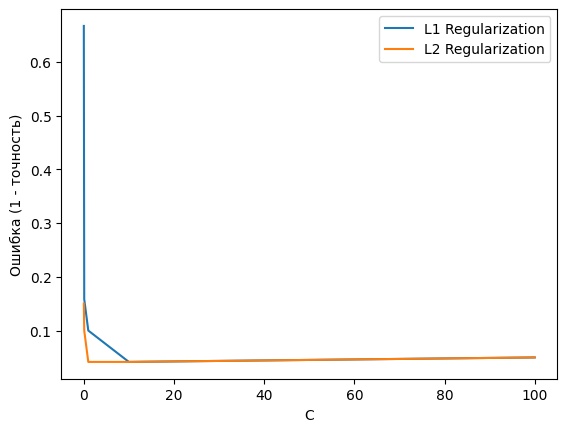

In [49]:
# Строим график ошибок для L1-регуляризации
plt.plot(C_values_l1, 1 - mean_test_scores_l1, label='L1 Regularization')

# Строим график ошибок для L2-регуляризации
plt.plot(C_values_l2, 1 - mean_test_scores_l2, label='L2 Regularization')

# Устанавливаем оси графика
plt.xlabel('C')
plt.ylabel('Ошибка (1 - точность)')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

Если смотреть на качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией) то можно сделать вывод, что модель на тестовых данных без регуляризации отрабатывает немного лучше остальных(хотя эта разница незначительная). Это связано с тем, что данные в целевой переменной равномерно распределены, данных в датасете немного и модель достаточно проста.

Регуляризация влияет на коэффициенты модели, добавляя к функции потерь штраф за большие веса, что помогает управлять переобучением и улучшать обобщающую способность модели.

L1-регуляризация (Lasso) может привести к обнулению некоторых коэффициентов модели. Это происходит из-за того, что L1 добавляет к функции потерь штраф, пропорциональный абсолютным значениям весов. Когда альфа увеличивается, более высока вероятность, что некоторые веса будут обнулены, что эффективно удаляет некоторые признаки из модели, делая L1 полезным для отбора признаков.

L2-регуляризация (Ridge), с другой стороны, штрафует коэффициенты, добавляя к функции потерь штраф, пропорциональный квадратам весов. Этот тип регуляризации снижает величину весов, но не обнуляет их, поэтому все признаки остаются в модели, хотя их влияние уменьшается. Это ограничивает влияние отдельных признаков на предсказание и борется с переобучением, но не способствует отбору признаков.

Определение оптимального значения параметра регуляризации обычно осуществляется с помощью техники, называемой кросс-валидацией. Мы использовали инструмент, такой как `GridSearchCV` из библиотеки `sklearn`, чтобы систематически исследовать различные значения альфа и найти то, которое дает лучшую производительность модели на валидационных данных.